# ML Project

In [2]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
# Importing the dataset
dataset = pd.read_csv('train.csv')
dataset_test=pd.read_csv('test.csv')


# Missing data analysis and visualization

In [4]:
# find the missing data
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
datatype=dataset.dtypes
missing_data = pd.concat([total, percent,datatype], axis=1, keys=['Total', 'Percent','DataType'])
missing_data_srt=missing_data.sort_values('Total',ascending=False).head(21)
missing_data_srt


,Total,Percent,DataType
PoolQC,1453,0.995205,object
MiscFeature,1406,0.963014,object
Alley,1369,0.937671,object
Fence,1179,0.807534,object
FireplaceQu,690,0.472603,object
LotFrontage,259,0.177397,float64
GarageFinish,81,0.055479,object
GarageQual,81,0.055479,object
GarageType,81,0.055479,object
GarageYrBlt,81,0.055479,float64


Text(0.5,1,'number of missing data by predictors')

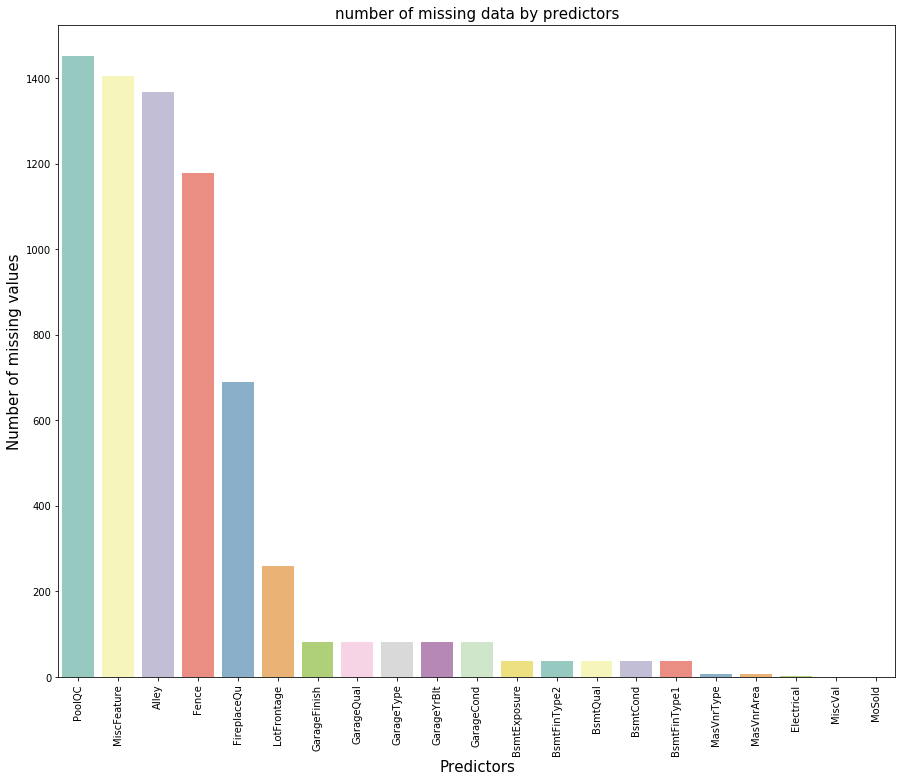

In [5]:
# missing data by features visualization 
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_data_srt.index, y='Total',data=missing_data_srt,color='b',palette='Set3')
plt.xlabel('Predictors', fontsize=15)
plt.ylabel('Number of missing values', fontsize=15)
plt.title('number of missing data by predictors', fontsize=15)

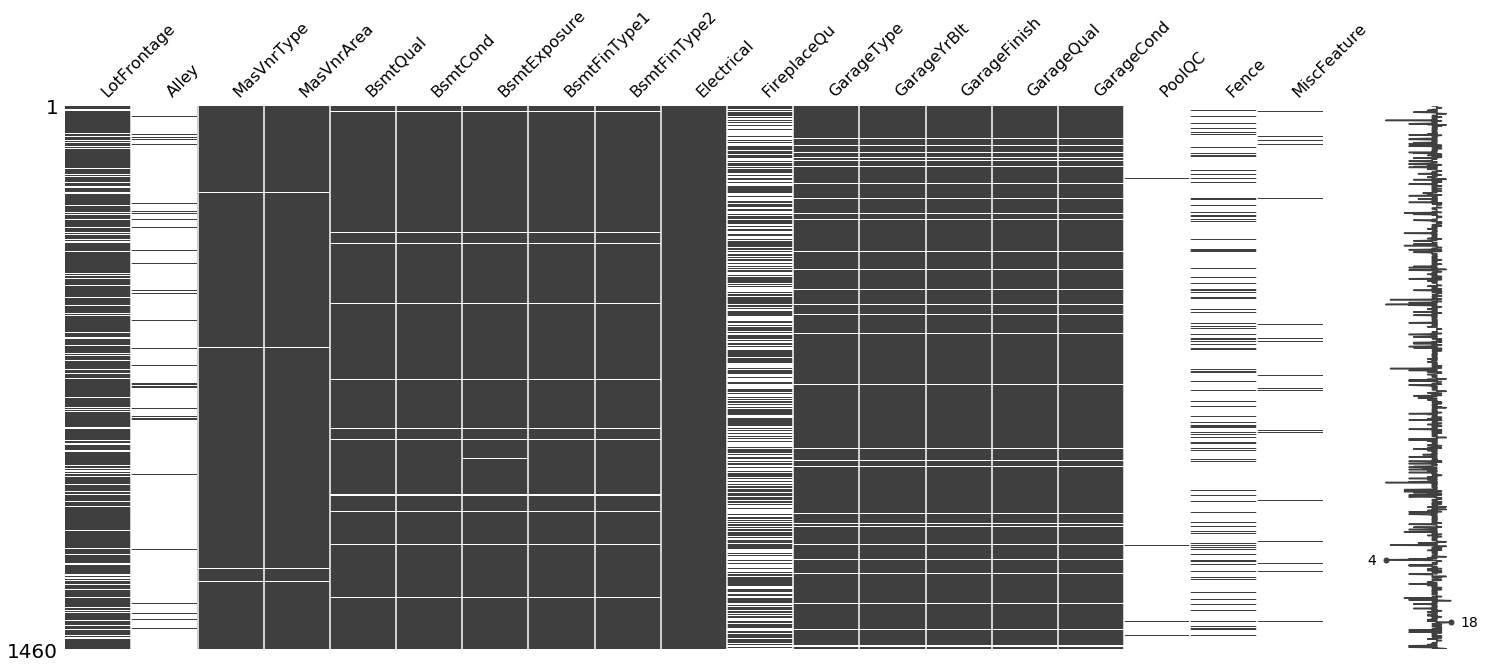

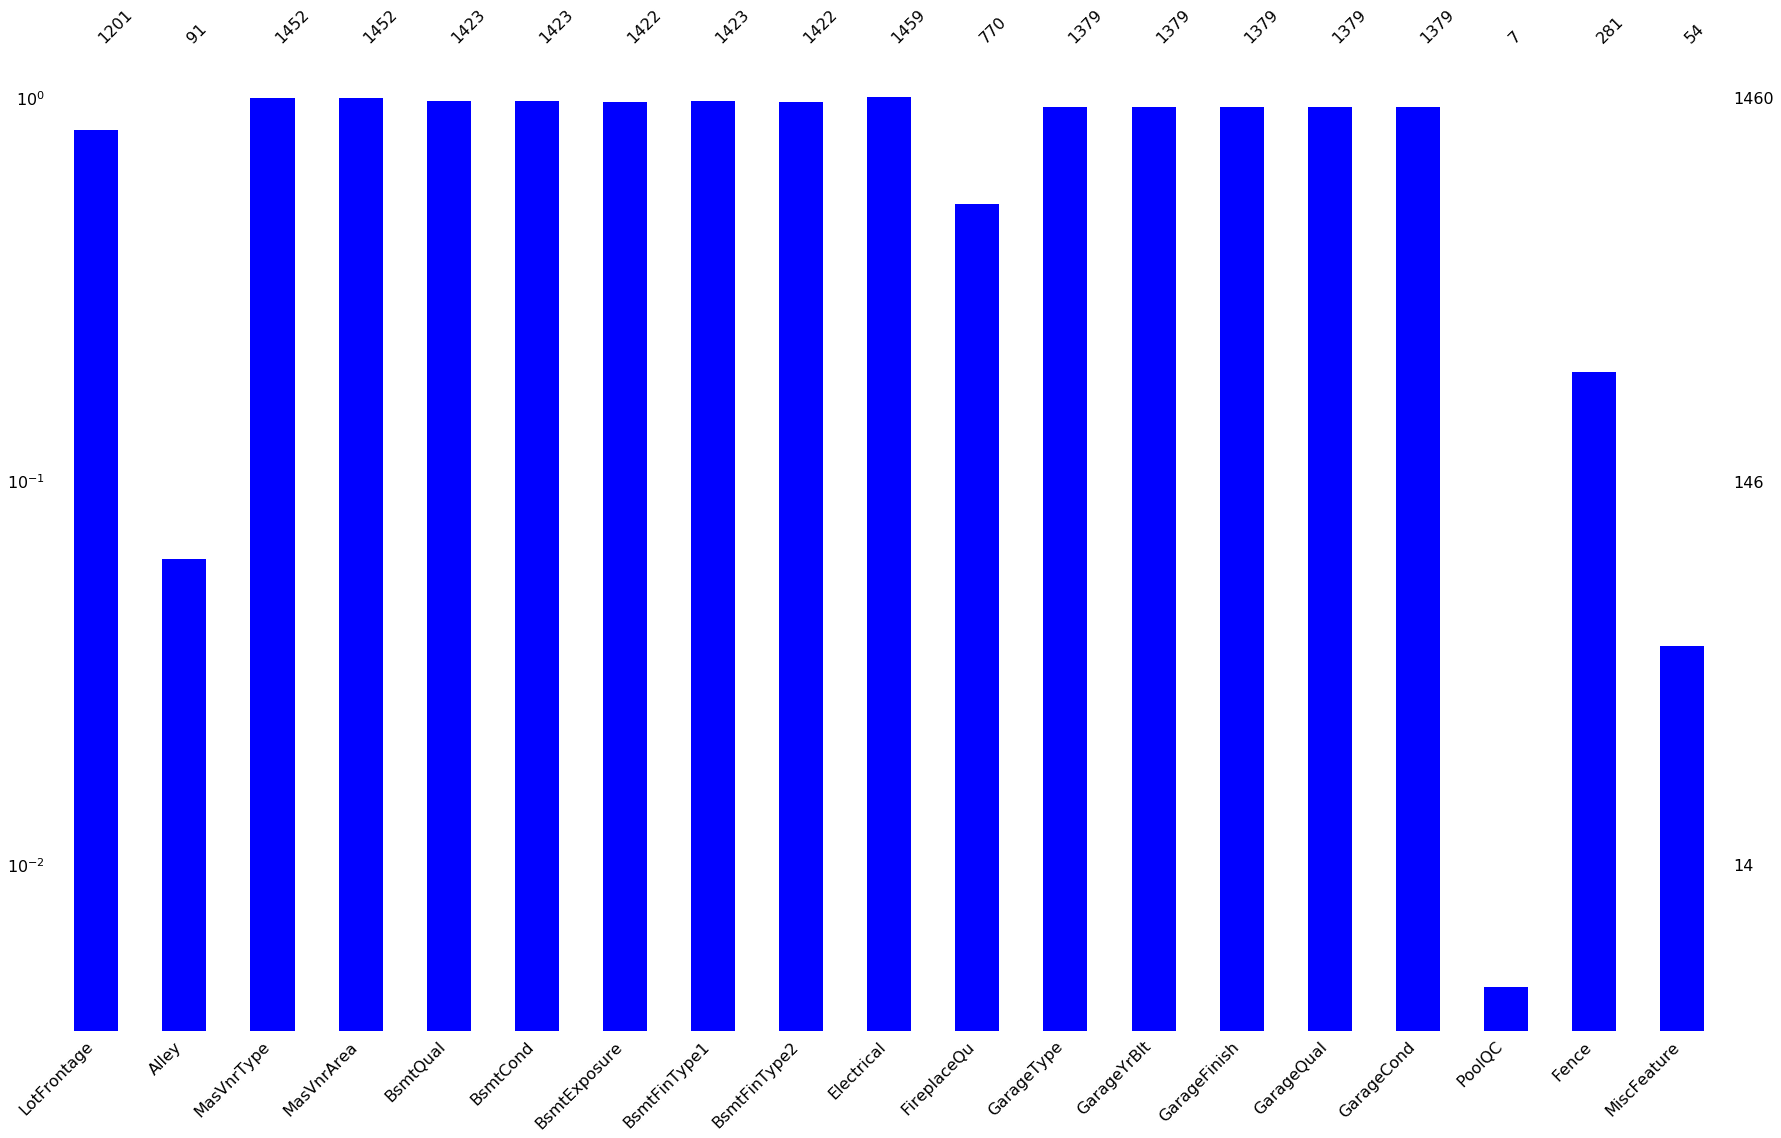

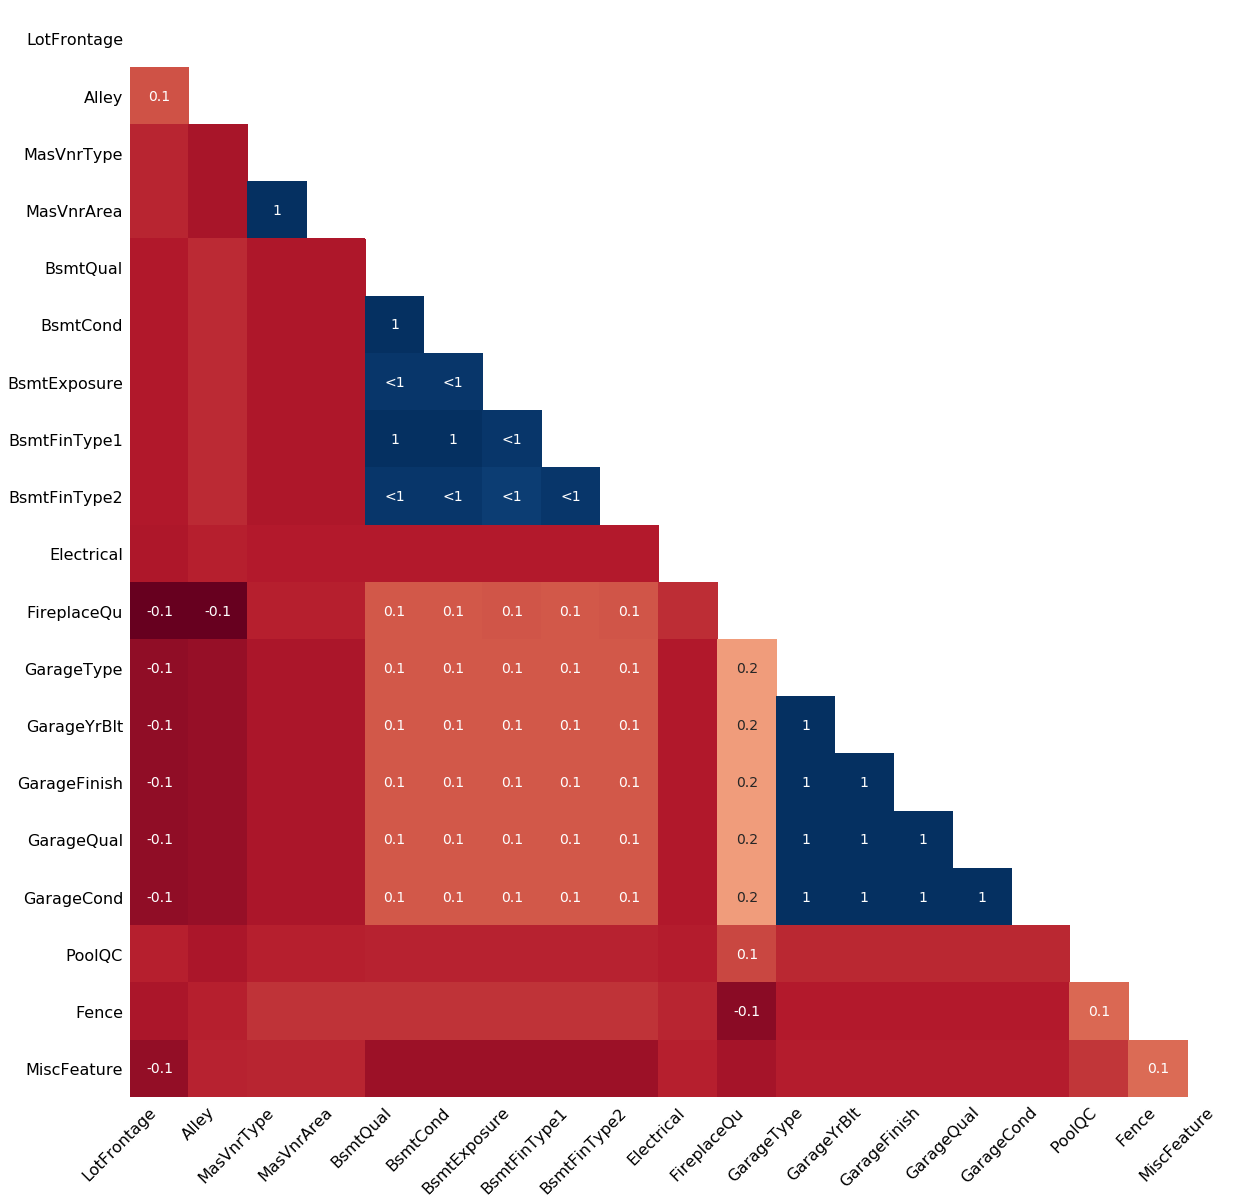

In [6]:
# missing data analysis packages
import missingno as msno
%matplotlib inline

#train_df = pd.read_csv('train_2016_v2.csv', parse_dates=["transactiondate"])
#properties_df = pd.read_csv('properties_2016.csv')
#merged_df = pd.merge(train_df,properties_df)
missing_dataset = dataset.columns[dataset.isnull().any()].tolist()
msno.matrix(dataset[missing_dataset])
msno.bar(dataset[missing_dataset], color="blue", log=True, figsize=(30,18))
msno.heatmap(dataset[missing_dataset], figsize=(20,20))

# Correlation matrix and scatter plot

In [7]:
# separate train and test data in to numerical data and categorica data
num_data=dataset.select_dtypes(exclude=['object'])
cat_data=dataset.select_dtypes(exclude=['number'])
num_data_test=dataset_test.select_dtypes(exclude=['object'])
cat_data_test=dataset_test.select_dtypes(exclude=['number'])
num_data.head()
#cat_data.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


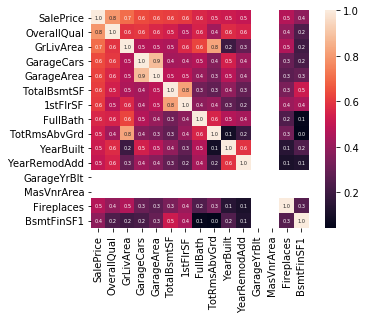

In [8]:
#correlation matrix
#largest columns of the correlation matrix
#most important corelated columns
corrmat = num_data.corr()
k = 15 #number of variables for heatmap
# largest columns of the sales price correlation matrix
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(num_data[cols].values.T) # correlation matric of the data table after taking transpose of the data table
#sns.set(font_scale=1.25)
hmap = sns.heatmap(cm, cbar=True, annot=True ,square=True, fmt='.1f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

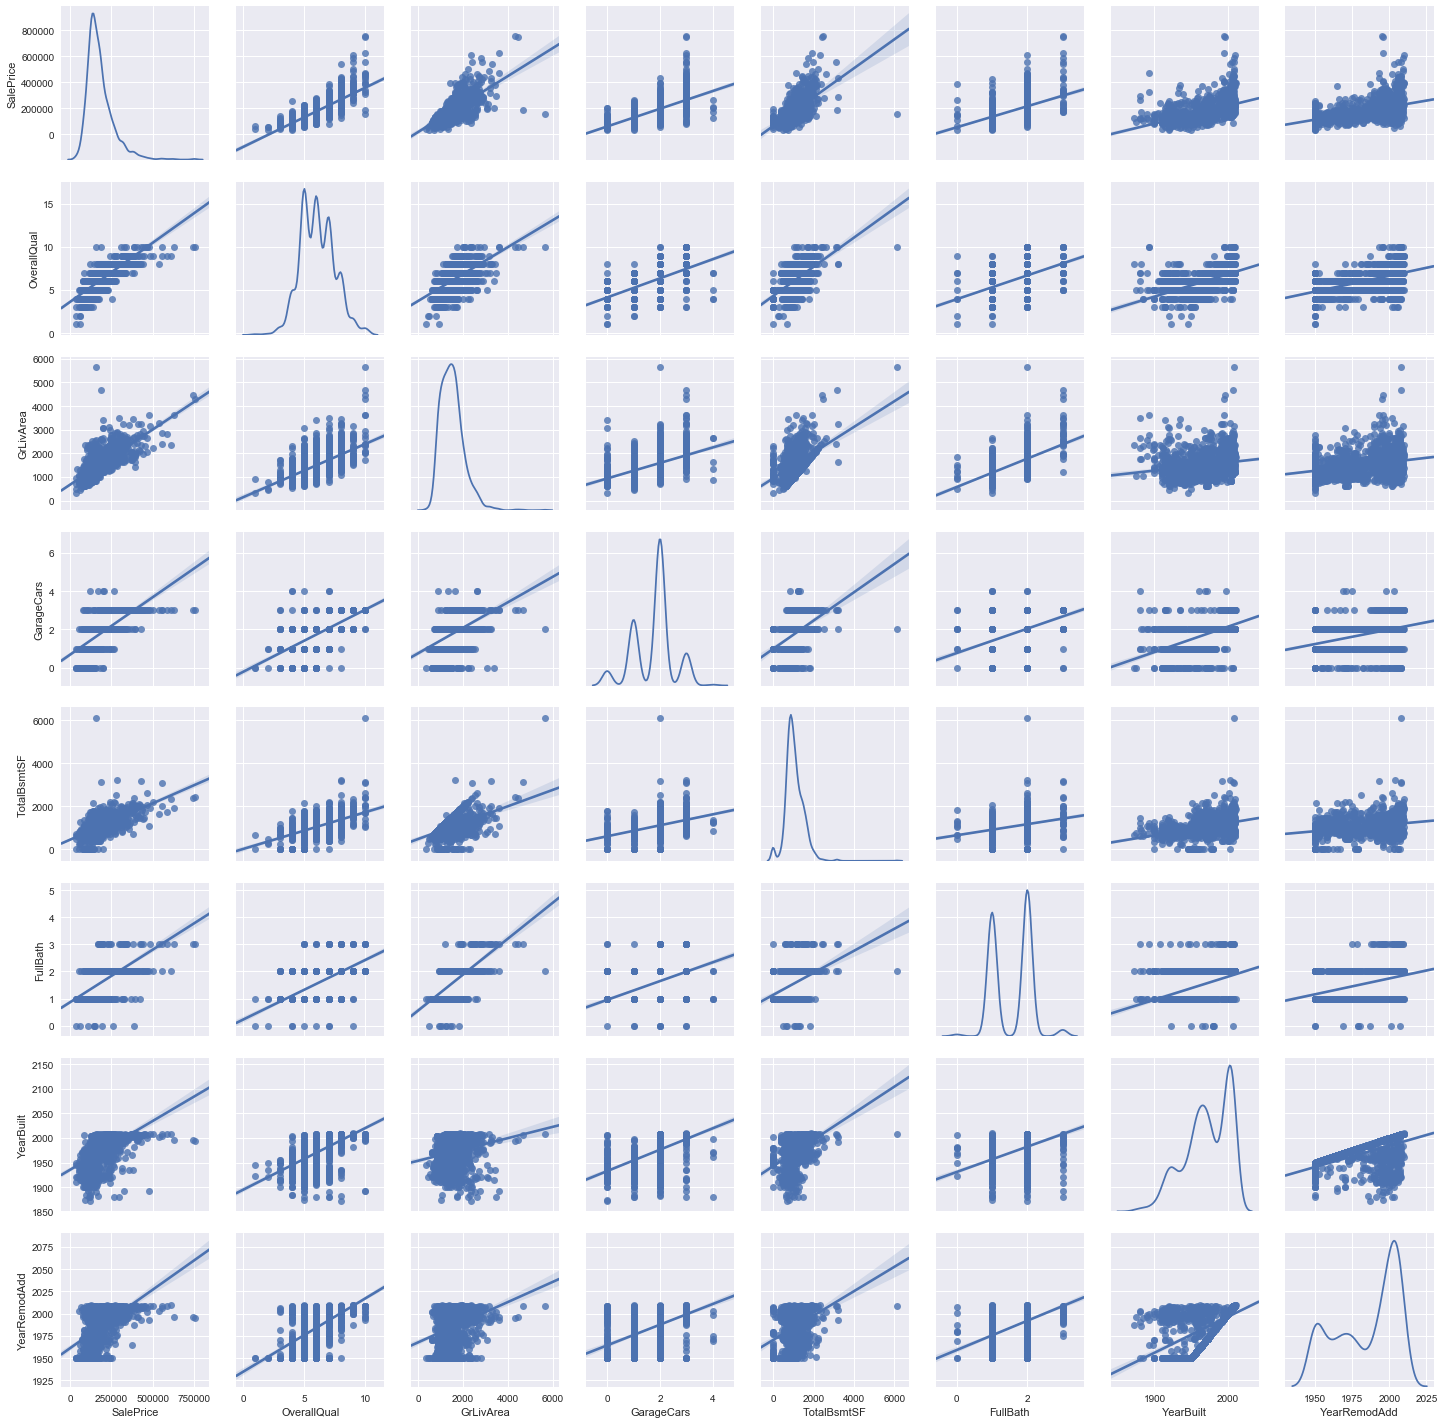

In [9]:
#scatterplots of top efeective varibles
sns.set()
colms = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','YearRemodAdd']
#sns.pairplot(num_data[colms], size = 2.5, hue="OverallQual", palette="husl", kind="reg", diag_kind="kde")
sns.pairplot(num_data[colms], size = 2.5, palette="Set3", kind="reg", diag_kind="kde")
plt.show();

# Following plots indicate me that there is Skewness in Salesprice, GrLiveArea,TotalBsmtSF, YearBuilt.
# we can normalised using log transform on above columns

# Cleaning the data

In [10]:
# check numerical columns missing data
num_data.isnull().sum().sort_values(ascending=False).head(5)

# check categorical columns mising values
cat_data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
Condition1         0
Neighborhood       0
LandSlope          0
dtype: int64

In [11]:
# imputing missing values as a average of the columns
# numerical columns only 
# num_data=num_data.fillna(num_data.mean())
# num_data.head(5)

#or

#following is other suggestion from Kaggle kernal
num_data['LotFrontage']=dataset.groupby(['Neighborhood'])["LotFrontage"].transform(lambda x: x.fillna(x.median()))
num_data["MasVnrArea"] = dataset['MasVnrArea'].fillna(0)
num_data["GarageYrBlt"] = dataset['GarageYrBlt'].fillna(0)
# you might need to GarageYrBlt column
num_data.isnull().sum().sort_values(ascending=False)

SalePrice        0
BsmtFinSF1       0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
MasVnrArea       0
YrSold           0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
MSSubClass       0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
Id               0
dtype: int64

## function for data cleaning 

In [12]:
# This is better way to clean data for train and test both
# function to fill missing values 

def miss_clean(data):
    
    if 'SalePrice' in data.columns:
        data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)
    
    #numerical missing columns
    data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(x.median()))
    data['MasVnrArea'].fillna(0, inplace=True)
    data['GarageYrBlt'].fillna(data['YearBuilt'], inplace=True)

    #categorical missing columns where missing is a category
    data['PoolQC'].fillna('None', inplace=True)
    data['MiscFeature'].fillna('None', inplace=True)
    data['Alley'].fillna('None', inplace=True)
    data['Fence'].fillna('None', inplace=True)
    data['FireplaceQu'].fillna('None', inplace=True)
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        data[col] = data[col].fillna('None')
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        data[col] = data[col].fillna('None')
    
    #categorical missing columns by mode of the missings columns
    data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
    data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
    data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
    data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
    data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
    data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])
    #data["Functional"] = data["Functional"].fillna("Typ")
    data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        data[col] = data[col].fillna(0)

    #data.drop(['Utilities'], axis=1, inplace=True)
    # data["TotalSF"] = data["TotalBsmtSF"] + data["1stFlrSF"] + data["2ndFlrSF"]
    # data.drop(["TotalBsmtSF","1stFlrSF","2ndFlrSF"], axis=1, inplace=True)
    
    return data


In [13]:
# function to convert numerical type to categorical data
# numerical columns are actually categorical and we need to convert it

def num_category(data):
    
    data['YrSold'] = data['YrSold'].astype('str')
    data['MoSold'] = data['MoSold'].astype('str')
    data['OverallQual'] = data['OverallQual'].astype('str')
    data['MSSubClass'] = data['MSSubClass'].astype('category')
    data['OverallCond'] = data['OverallCond'].astype('str')
    
    return data

In [14]:
# clean data
clean_data1=miss_clean(dataset)
clean_final=num_category(clean_data1)

clean_final.isnull().sum().sort_values(ascending=False).head(20)


SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
YearRemodAdd    0
dtype: int64

In [15]:
#dymmyfy categorical variables
X1=pd.get_dummies(clean_final)
# separating features and target
Y1=np.log1p(X1['SalePrice'])
X1.drop(['Id','SalePrice'],axis=1,inplace=True)


# Regression models

In [16]:
# importing library for differents models
from sklearn.linear_model import LinearRegression, Lasso,Ridge, LassoLarsIC, LassoCV, ElasticNet,BayesianRidge
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb
import lightgbm as lgb

In [17]:
# further split train and test data
# separating our train dataset into further train and test for cross valudation
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.2 , random_state = 0)


In [18]:
# function to calculate root mean square error with crossvalidation
# input is the specifi model and output is the rmse and r^2 values

n_folds = 10
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=10).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# function to calculate R^2 
def rsquare_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=10).get_n_splits(X_train.values)
    rmse= np.sqrt(cross_val_score(model, X_train.values, y_train, cv = kf))
    return(rmse)




In [19]:
# removing columns with low variance

import sklearn.feature_selection as fs
x_new = fs.VarianceThreshold(threshold = 1).fit_transform(X_train)
x_new.shape



(1166, 23)

In [20]:
# model selection using f-test
import sklearn.feature_selection as fs
#### Your code here, call the result select2
select2 = fs.SelectKBest(fs.f_regression, k=30).fit_transform(X_train,y_train)
print(select2.shape)

(1166, 30)


## Ols regression

In [21]:
#Ols model
ols = LinearRegression()
score=rmse_cv(ols) # score with cross validation
rsquare=rsquare_cv(ols)
print('ols score(rmse) : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
print('ols R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))


## fit your linear model with fit() function
#ols.fit(x, y)

ols score(rmse) : 0.13740 (0.01480)
ols R^2 : 0.93640 (0.01181)


## Lasso regression

In [22]:
# lasso regression ( more consise way)
# ElasNet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.05, l1_ratio=0.5, random_state=1))

lasso = Lasso(alpha =0.0005, random_state=1)
score=rmse_cv(lasso) # score with cross validation
rsquare=rsquare_cv(lasso)
print('lasso score : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
print('lasso R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))


lasso score : 0.11899 (0.01576)
lasso R^2 : 0.95246 (0.01085)


In [23]:
# Grid search on Lasso
# look how to choose fraction parameters range

from sklearn.model_selection import GridSearchCV
lasso = Lasso()

grid_param2 = [{'alpha': np.arange(0.0001, 0.001, 0.0001)}]

para_search2 = GridSearchCV(lasso, grid_param2, cv=5, return_train_score=True)
para_search2.fit(X_train,y_train)
para_search2.cv_results_
para_search2.grid_scores_

print(para_search2.best_score_)
print(para_search2.best_params_)

lasso_best = para_search2.best_estimator_
print(lasso_best.fit(X_train,y_train))
print(lasso_best.score(X_train,y_train))

0.9062686747783291
{'alpha': 0.0005}
Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
0.9378675560442543


In [24]:
# validation curve -lasso
from sklearn.model_selection import validation_curve

# range to search parameters
param_range = np.arange(0.0001, 0.001, 0.0001)
# dictionary with parameters and range for gride
kwargs = dict(param_name='alpha', param_range=param_range)

#training and test scores for varying parameter values and k-fold cross validation
train_scores, test_scores = validation_curve(lasso, X_train,y_train, **kwargs, cv=5)
# take mean over all crossvalidate result(different sample)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_scores_mean

array([0.95331826, 0.95005328, 0.94738837, 0.94462944, 0.94189002,
       0.93927667, 0.93704115, 0.93496232, 0.93300871])

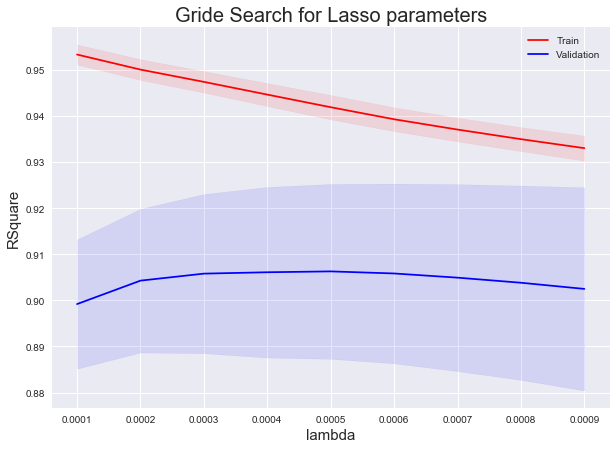

In [27]:
# Train mean and standard deviation

plt.figure(figsize=(10,7))
plt.plot(param_range, train_scores_mean, color='r')
train_y1 = train_scores_mean - train_scores_std
train_y2 = train_scores_mean + train_scores_std
plt.fill_between(param_range, y1=train_y1, y2=train_y2, color='r', alpha=0.1)

# Test mean and standard deviation
plt.plot(param_range, test_scores_mean,color='b')
test_y1 = test_scores_mean - test_scores_std
test_y2 = test_scores_mean + test_scores_std
plt.xlabel('lambda',fontsize=15)
plt.ylabel('RSquare',fontsize=15)
plt.title('Gride Search for Lasso parameters', fontsize=20)
plt.legend(('Train', 'Validation'),loc='upper right')
plt.fill_between(param_range, y1=test_y1, y2=test_y2, color='b', alpha=0.1)
plt.show()

# on x axis , number of k
# to choose , two things need to consider, decrepancy and accruracy 

## Ridge regression

In [28]:
#ridge regression
ridg=Ridge(alpha =5, random_state=1)
score=rmse_cv(ridg) # score with cross validation
rsquare=rsquare_cv(ridg)
print('Ridge score : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
print('Ridge R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))


Ridge score : 0.11945 (0.01511)
Ridge R^2 : 0.95241 (0.00949)


In [29]:
# Grid search on Ridge
# look how to choose fraction parameters range

from sklearn.model_selection import GridSearchCV
ridge = Ridge(random_state=1)

grid_param2 = [{'alpha': np.arange(0,50,1)}]

para_search2 = GridSearchCV(ridge, grid_param2, cv=10, return_train_score=True)
para_search2.fit(X_train,y_train)
para_search2.cv_results_
para_search2.grid_scores_

print(para_search2.best_score_)
print(para_search2.best_params_)

ridge_best = para_search2.best_estimator_
print(ridge_best.fit(X_train,y_train))
print(ridge_best.score(X_train,y_train))

0.9078735630334709
{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='auto', tol=0.001)
0.9422429830188833


[0.89977042 0.90429625 0.90631998 0.90742987 0.90809023 0.90849309
 0.90873385 0.90886573 0.908921   0.90892042 0.90887799 0.90880352
 0.90870408 0.90858493]


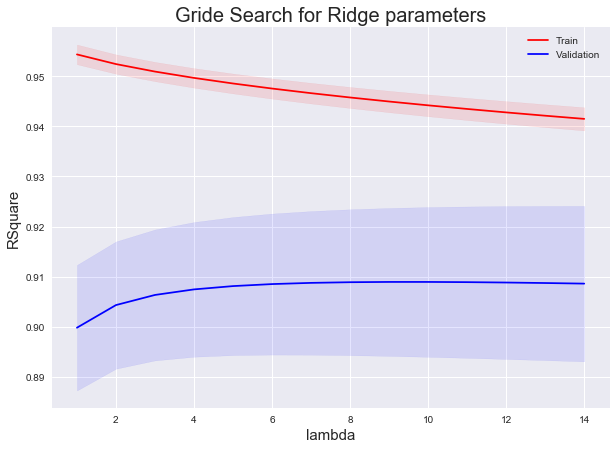

In [30]:
# validation curve -lasso
from sklearn.model_selection import validation_curve

# range to search parameters
param_range = np.arange(1, 15,1)
# dictionary with parameters and range for gride
kwargs = dict(param_name='alpha', param_range=param_range)

#training and test scores for varying parameter values and k-fold cross validation
train_scores, test_scores = validation_curve(ridge, X_train,y_train, **kwargs, cv=5)
# take mean over all crossvalidate result(different sample)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)


# Train mean and standard deviation

plt.figure(figsize=(10,7))
plt.plot(param_range, train_scores_mean, color='r')
train_y1 = train_scores_mean - train_scores_std
train_y2 = train_scores_mean + train_scores_std
plt.fill_between(param_range, y1=train_y1, y2=train_y2, color='r', alpha=0.1)

# Test mean and standard deviation
plt.plot(param_range, test_scores_mean,color='b')
test_y1 = test_scores_mean - test_scores_std
test_y2 = test_scores_mean + test_scores_std
plt.xlabel('lambda',fontsize=15)
plt.ylabel('RSquare',fontsize=15)
plt.title('Gride Search for Ridge parameters', fontsize=20)
plt.legend(('Train', 'Validation'),loc='upper right')
plt.fill_between(param_range, y1=test_y1, y2=test_y2, color='b', alpha=0.1)
plt.show()

# on x axis , number of k
# to choose , two things need to consider, decrepancy and accruracy 



## ElasticNet regression

In [31]:
#elastic net regression
ENet=ElasticNet(alpha=0.0005, random_state=1)
#ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score=rmse_cv(ENet) # score with cross validation
rsquare=rsquare_cv(ENet)
print('Elastic Net score : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
print('Elastic Net R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))


Elastic Net score : 0.11914 (0.01542)
Elastic Net R^2 : 0.95245 (0.01043)


In [32]:
# Grid search on ElasticNet
# look how to choose fraction parameters range

from sklearn.model_selection import GridSearchCV
ENet = ElasticNet(random_state=1)

grid_param2 = [{'alpha': np.arange(0.0001,0.001,0.0001)}]

para_search2 = GridSearchCV(ENet, grid_param2, cv=10, return_train_score=True)
para_search2.fit(X_train,y_train)
para_search2.cv_results_
para_search2.grid_scores_

print(para_search2.best_score_)
print(para_search2.best_params_)

ENet_best = para_search2.best_estimator_
print(ENet_best.fit(X_train,y_train))
print(ENet_best.score(X_train,y_train))

0.9078979315565263
{'alpha': 0.0007000000000000001}
ElasticNet(alpha=0.0007000000000000001, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=1, selection='cyclic', tol=0.0001,
      warm_start=False)
0.9414855243683645


[0.89347682 0.90322456 0.90594984 0.90663864 0.90680251 0.90647687
 0.90564605 0.90455337 0.9033291  0.90189669]


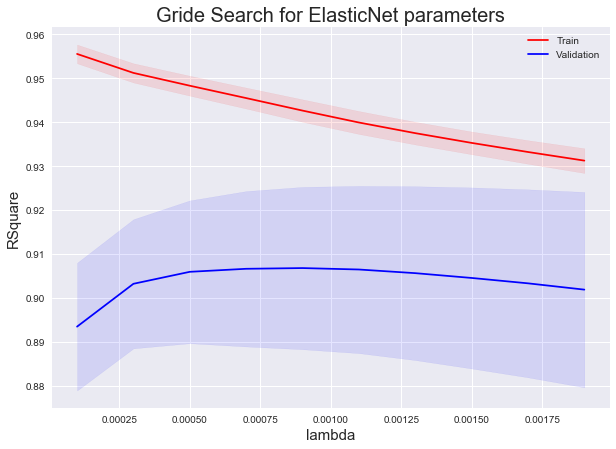

In [34]:
# validation curve -ENet
from sklearn.model_selection import validation_curve

# range to search parameters
param_range = np.arange(0.0001, 0.002,0.0002)
# dictionary with parameters and range for gride
kwargs = dict(param_name='alpha', param_range=param_range)

#training and test scores for varying parameter values and k-fold cross validation
train_scores, test_scores = validation_curve(ENet, X_train,y_train, **kwargs, cv=5)
# take mean over all crossvalidate result(different sample)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
print(test_scores_mean)


# Train mean and standard deviation

plt.figure(figsize=(10,7))
plt.plot(param_range, train_scores_mean, color='r')
train_y1 = train_scores_mean - train_scores_std
train_y2 = train_scores_mean + train_scores_std
plt.fill_between(param_range, y1=train_y1, y2=train_y2, color='r', alpha=0.1)

# Test mean and standard deviation
plt.plot(param_range, test_scores_mean,color='b')
test_y1 = test_scores_mean - test_scores_std
test_y2 = test_scores_mean + test_scores_std
plt.xlabel('lambda',fontsize=15)
plt.ylabel('RSquare',fontsize=15)
plt.title('Gride Search for ElasticNet parameters', fontsize=20)
plt.legend(('Train', 'Validation'),loc='upper right')
plt.fill_between(param_range, y1=test_y1, y2=test_y2, color='b', alpha=0.1)
plt.show()

# on x axis , number of k
# to choose , two things need to consider, decrepancy and accruracy 


## Random forest regression

In [35]:
Rand_For=RandomForestRegressor()
score=rmse_cv(Rand_For) # score with cross validation
rsquare=rsquare_cv(Rand_For)
print('Random Forest score : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
print('Random Forest R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))



Random Forest score : 0.15438 (0.02015)
Random Forest R^2 : 0.91594 (0.01844)


In [47]:

from sklearn.model_selection import GridSearchCV
Rand_For=RandomForestRegressor()

grid_param2 = [{'n_estimators': np.arange(1,10,3),'min_samples_split':np.arange(2,5,1),'min_weight_fraction_leaf':np.arange(0,0.5,0.1)}]

para_search2 = GridSearchCV(Rand_For, grid_param2, cv=10, return_train_score=True)
para_search2.fit(X_train,y_train)
#para_search2.cv_results_
#para_search2.grid_scores_

print(para_search2.best_score_)
print(para_search2.best_params_)

Rand_for_best = para_search2.best_estimator_
print(Rand_for_best.fit(X_train,y_train))
print(Rand_for_best.score(X_train,y_train))

0.8355218416646573
{'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 7}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
0.9611736599782177


## Bagging regression

In [64]:
bag = BaggingRegressor()
score=rmse_cv(bag) # score with cross validation
rsquare=rsquare_cv(bag)
print('Random Forest score : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
print('Random Forest R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))


Random Forest score : 0.15698 (0.02015)
Random Forest R^2 : 0.92053 (0.01395)


In [65]:

from sklearn.model_selection import GridSearchCV
bag = BaggingRegressor()


grid_param2 = [{'n_estimators':np.arange(1,15,1), 'max_samples':np.arange(1,5,1), 'max_features':np.arange(1,5,1)}]

para_search2 = GridSearchCV(bag, grid_param2, cv=10, return_train_score=True)

para_search2.fit(X_train,y_train)
#para_search2.cv_results_
#para_search2.grid_scores_

print(para_search2.best_score_)
print(para_search2.best_params_)

Rand_for_best = para_search2.best_estimator_
print(Rand_for_best.fit(X_train,y_train))
print(Rand_for_best.score(X_train,y_train))

0.11313054085192675
{'max_features': 2, 'max_samples': 3, 'n_estimators': 14}
BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=2, max_samples=3,
         n_estimators=14, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)
0.10050711863655483


## Boosting regression

In [55]:
#gboost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.085,max_depth=2, max_features=10,loss="huber")

In [73]:
#gboost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.085,max_depth=2, max_features=10,loss="huber")
gboost = GradientBoostingRegressor()
score=rmse_cv(gboost) # score with cross validation
rsquare=rsquare_cv(gboost)
print('Gradient boost score : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
print('Gradiaent boost R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))



Gradient boost score : 0.13052 (0.01965)
Gradiaent boost R^2 : 0.94206 (0.01460)


In [76]:

from sklearn.model_selection import GridSearchCV

grid_param2 = [{'n_estimators':np.arange(100,1000,100),'learning_rate':np.arange(0.001,0.1,0.002), 'max_depth':np.arange(1,5,1), 'max_features':np.arange(1,15,2)}]

para_search2 = GridSearchCV(gboost, grid_param2, cv=5, return_train_score=True)

para_search2.fit(X_train,y_train)
#para_search2.cv_results_
#para_search2.grid_scores_

print(para_search2.best_score_)
print(para_search2.best_params_)

Rand_for_best = para_search2.best_estimator_
print(Rand_for_best.fit(X_train,y_train))
print(Rand_for_best.score(X_train,y_train))

KeyboardInterrupt: 

## XGboost regression

In [71]:
import xgboost as xgb
xgboo = xgb.XGBRegressor()
score=rmse_cv(xgboo) # score with cross validation
rsquare=rsquare_cv(xgboo)
print('XGboost score : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
print('XGboost R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))



XGboost score : 0.13386 (0.01844)
XGboost R^2 : 0.93945 (0.01409)


# stacking or ensamble of the models

In [ ]:
# stacking predictions , may be do more sofisticated
combined_pred = (
    lm.predict(test) +
    model_xgb.predict(test) +
    bag.predict(test) +
    model_lasso.predict(test) +
    elastic_net.predict(test) +
    gboost.predict(test)) / 6
# print('R2: {}'.format(r2_score(combined_pred, y_test)))

In [ ]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()]

names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

# Multilinear regression Model building starting

In [77]:
# dividing feature and target variables from numerical data only
X = num_data.iloc[:, :-1] # features
y = num_data.iloc[:, -1] # targets
X.head(5)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


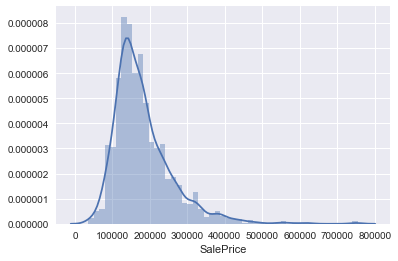

In [78]:
# looking target variables ( sales price)
X1=X
y.describe()
sns.distplot(y)

# building simple regression model

In [79]:
# Splitting the dataset into the Training set and Test set

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2 , random_state = 1)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [86]:
from math import sqrt

# measure R^2, RSS score
regressor.score(X_train,y_train)
print('R^2', regressor.score(X_test,y_test))
print("RSS: %.2f" % np.sum((y_test - regressor.predict(X_test))**2))
print(sum(abs(y_test - regressor.predict(X_test)))/292)
print(sqrt(np.sum(y_test - regressor.predict(X_test))**2)/292)



R^2 0.8190193003573013
RSS: 376897277811.91
21551.356793330942
3388.2146556364946


In [87]:
#### multiple linear regression fit with ols

from sklearn import linear_model
ols = linear_model.LinearRegression()

ols.fit(X_train,y_train)

print("R^2: %.5f" % ols.score(X_train, y_train))
print("RSS: %.2f" % np.sum((ols.predict(X_train) - y_train) ** 2))
print(sqrt(np.sum((ols.predict(X_train) - y_train) ** 2))/292)


R^2: 0.80872
RSS: 1361087350999.96
3995.3989168405765


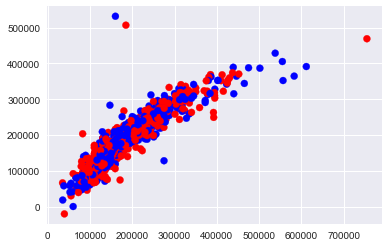

In [88]:
# visualization of prediction
plt.scatter(y_train,ols.predict(X_train), c=['r','b'])

In [99]:
# calculate these metrics by hand!
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(np.log(y_test),np.log(y_pred)))
print('MSE:', metrics.mean_squared_error(np.log(y_test),np.log(y_pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(np.log(y_test),np.log(y_pred))))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.13890274495241342
MSE: 0.05105833502829446
RMSE: 0.22596091482443253
RMSE: 35926.92725652428


# SVR regression

In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scale = sc_X.fit_transform(X1)
y_scale = sc_y.fit_transform([y])

X_scale
y_scale
X1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.000000,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.000000,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.000000,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.000000,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.000000,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
5,6,50,85.000000,14115,5,5,1993,1995,0.0,732,...,480,40,30,0,320,0,0,700,10,2009
6,7,20,75.000000,10084,8,5,2004,2005,186.0,1369,...,636,255,57,0,0,0,0,0,8,2007
7,8,60,70.049958,10382,7,6,1973,1973,240.0,859,...,484,235,204,228,0,0,0,350,11,2009
8,9,50,51.000000,6120,7,5,1931,1950,0.0,0,...,468,90,0,205,0,0,0,0,4,2008
9,10,190,50.000000,7420,5,6,1939,1950,0.0,851,...,205,0,4,0,0,0,0,0,1,2008


In [40]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X1, y)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:

# Predicting a new result
y_pred = regressor.predict(6.5)
y_pred = sc_y.inverse_transform(y_pred)


# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'g')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'g')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.sh